### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline
from scipy.optimize import brentq


0.05


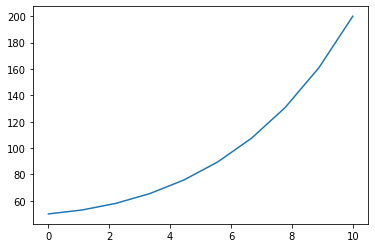

In [103]:
a = 5*10**(-2)
t0 = 20

x = np.linspace(0, 10, 10)
#init value 
ti = 50
tdot = 5    # guess value
# final value
tf = 10 
yf = 200

def rhs(y,x):
    return[
        y[1],
        -a*(t0-y[0])
    ]


def obf(tdot):
    sol = odeint(rhs,[ti,tdot],x)
    yff = sol[-1,0]
    
    return yff-yf

# sol = odeint(rhs,[ti,tdot],x)
tdot = brentq(obf,-100,100)
tdot

plt.plot(x,odeint(rhs,[ti,tdot],x)[:,0])
print(a)


___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

[[-2.000005  1.        0.       ...  0.        0.        0.      ]
 [ 1.       -2.000005  1.       ...  0.        0.        0.      ]
 [ 0.        1.       -2.000005 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... -2.000005  1.        0.      ]
 [ 0.        0.        0.       ...  1.       -2.000005  1.      ]
 [ 0.        0.        0.       ...  0.        1.       -2.000005]]
[[ 1.        0.        0.       ...  0.        0.        0.      ]
 [ 1.       -2.000005  1.       ...  0.        0.        0.      ]
 [ 0.        1.       -2.000005 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... -2.000005  1.        0.      ]
 [ 0.        0.        0.       ...  1.       -2.000005  1.      ]
 [ 0.        0.        0.       ...  0.        0.        1.      ]]
[ 5.e+01 -1.e-04 -1.e-04 ... -1.e-04 -1.e-04  2.e+02]


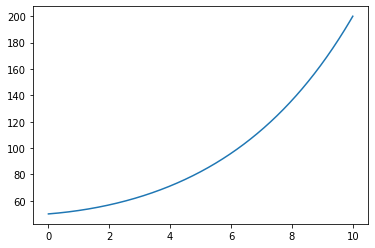

In [104]:
from scipy.sparse import diags
n = 1000 
h = (10-0)/n


# A 
A = diags([1,(-2-a*h**2), 1], [-1, 0, 1], shape=(n+1, n+1)).toarray()
print(A)

# fill zero for first and last row
for i in range(len(A[0])):
    A[0][i] = 0
    A[-1][i] = 0

# fill correct first and last row 
A[0][0] = 1
A[-1][-1] = 1 
print(A)

# B
B = np.zeros(n+1)
B[0] = 50
B[-1] = 200
B[1:-1] = -a*t0 * h**2
print(B)

y = np.linalg.solve(A, B)
x = np.linspace(0, 10, n+1)
plt.plot(x,y)